# Speaker Calibration 

To calibrate the underwater sepaker system, an experiment is performed to directly relate the applyied signal to the measured sound pressure. The source pressure level (SPL) is indicated in  dB re 1 µPa at 1 m distancce. The calibration is a conversion factor from the applied digital signal amplitude to the source pressure level and indicated in dB re $\mu$Pa/V. This caöibration is dependent on the frequency and also on the direction from the speaker. It takes into account the hole signal chain from digital to analog conversion, audio amplifier, and speaker.
First an overview of the system is given and the available specification of all components are indicated. A special experiment was performed in the cold sea water of Norway to measure the end to end transfer function of the speaker system. In a dedicated setup, hydrophones were mounted at 1 m distance in front of the speaker. Playing white noise allows then to compute the frequency dependent transfer function as well as to infer the signal delays and even measure the linearity of the system. 

## System overview 

A technical overview of the underwater speaker system with all components relevant for the calibartion and charcetrization of the radiated acoustic field.

### Diagram 

![Image](SystemDiagram.png)

The system is mobile, powered by a lead-acid battery and packed into a water proof transport case. The controller is based on National Instrumenst CompactRIO platform. The sytem has one output channel and several input channels for hydrophones. A GPS module (not shown in diagram) syncronizes the IO data to within 100 ns to the GPS clock and gives positional information. 

### Underwater Sepaker

![image](Lubell%20916.png)

The underwater speaker is the commercial [Lubell LL916](https://www.lubell.com/LL916.html) which is used by Olympic synchronous swimmers and the navy for example. It is a piezo transducer with two circular hard shells. Therefore, the radiation will not be isotropic in the horizontal plane and the frequency response is not flat but limited by the mechanical resonances. 

![image](Lubell%20Plots.png)

For this loudspeaker some calibration measurements are available. It shows the frequency dependence of the emission for different horizontal angles (left). The angular dependency is shown in full detail for 5 kHz (right). This values are the for the speaker alone. We are interested in the combined system gain including the amplifiers. 

### Amplifier and Adaptation Transfomer

![image](TrafoAmp.png)

The amplifier is a single channel (mono) class-D amplifier. [Class-D](https://www.infineon.com/dgdl/an-1071.pdf?fileId=5546d462533600a40153559538eb0ff1) means it is just a binary switch operated at high frequency (1MHz) with a feedback control loop. Then the output is filtered and smoothed. Such amplifiers are very efficient (>95%). The [amplifier board](https://www.banggood.com/de/XH-M542-TPA3116D2-Mono-100W-Digital-Amplifier-Board-Digital-Audio-Power-DIY-HIFI-Amp-Module-12-26V-DC-p-1660821.html?cur_warehouse=CN&utm_design=18&utm_email=1597486674_2332&utm_source=emarsys&utm_medium=Neworder171109&utm_campaign=trigger-order&utm_content=linux&sc_src=email_2675773&sc_eh=7096be48402c59a91&sc_llid=24722059&sc_lid=105229698&sc_uid=9NeyMiLRc7) is based on the [TPA3116D2](https://www.ti.com/product/TPA3116D2) and mounted in a tight metal casing to screen the high frequency signals that could disturb the sensitive hydrophone signals. Such amplifier is designed for electromagnetic audio loudspeakers and to drive the piezo transducer an adaptation transformer ([Model AC205B](https://www.lubell.com/transformer.html)) is needed to match the impedance. 

### Ananlog/Digital Converters

![image](NI%20AD%20DA.png)

The instrument-grade analog to digital (AD) and digital to analog (DA) converters are from National Instruments ([NI-9260](https://www.ni.com/docs/de-DE/bundle/ni-9260-specs/page/specs.html), [NI-9234](https://www.ni.com/docs/en-US/bundle/ni-9234-specs/page/specs.html)). These are 24-bit sigma-delta converters with a high dynamic range. They all run on a common clock and sample at 51.2 kHz.

### Hydrophones

![image](Hydrophone.png)

The hydrophones are a special edition of the hydrophones [HTI-96](http://www.hightechincusa.com/products/hydrophones/hti96minexportable.html) (High Tech Inc., USA), that comprise an ICP preamplifier. The NI AD modules can deliver the excitation current of 2 mA for the preamplifiers. The sensitivity is -170 dB re 1V/µPa. All hydrophones come with a calibration certificate and do not differ more than +/- 0.2 dB. We use the value of -170 dB for all hydrophones.

## Calibration Experiment

To measure the gain of the system, we mounted hydrophones at a distance of 1 m to the speaker and measured the transferfunctions by playing white noise. 

### Setup 

![image](Speaker%20Calibration.png)
We mounted four hydrophones at 1m distance to the speaker. On each side one hydrophone was 
mounted in axial position and one in vertical position. The material was Nylon or Polyethylene (PE HD), both materials are almost transparent for acoustics under water.

### Test Site 

Our test site was a sheltered basin south of Skjervoy called "Enessundet". It was about 90m deep at the place of the experiment. Early in the Morning on 28.12.2021 8:38 UTC in conplete darkness:

In [44]:
import numpy as np
import nptdms as ts
import matplotlib.pyplot as plt
import matplotlib.ticker as tik
import matplotlib.dates as mdates
import scipy.signal as spsig
import cartopy.crs as ccrs
import cartopy.feature
import cartopy.io.shapereader as csr
from datetime import datetime

In [2]:
file = ts.TdmsFile.read("2021-12-28--08-38-32--Rec-D.tdms")

In [4]:
# read the position of the experiment from the file
site_lat = file['Track']['Latitude (deg)'][:].mean()
site_lon = file['Track']['Longitude (deg)'][:].mean()

In [6]:
# define a orthographic projection centered at the site
LatLon = ccrs.PlateCarree()
Ortho = ccrs.Orthographic(central_longitude=site_lon, central_latitude=site_lat)

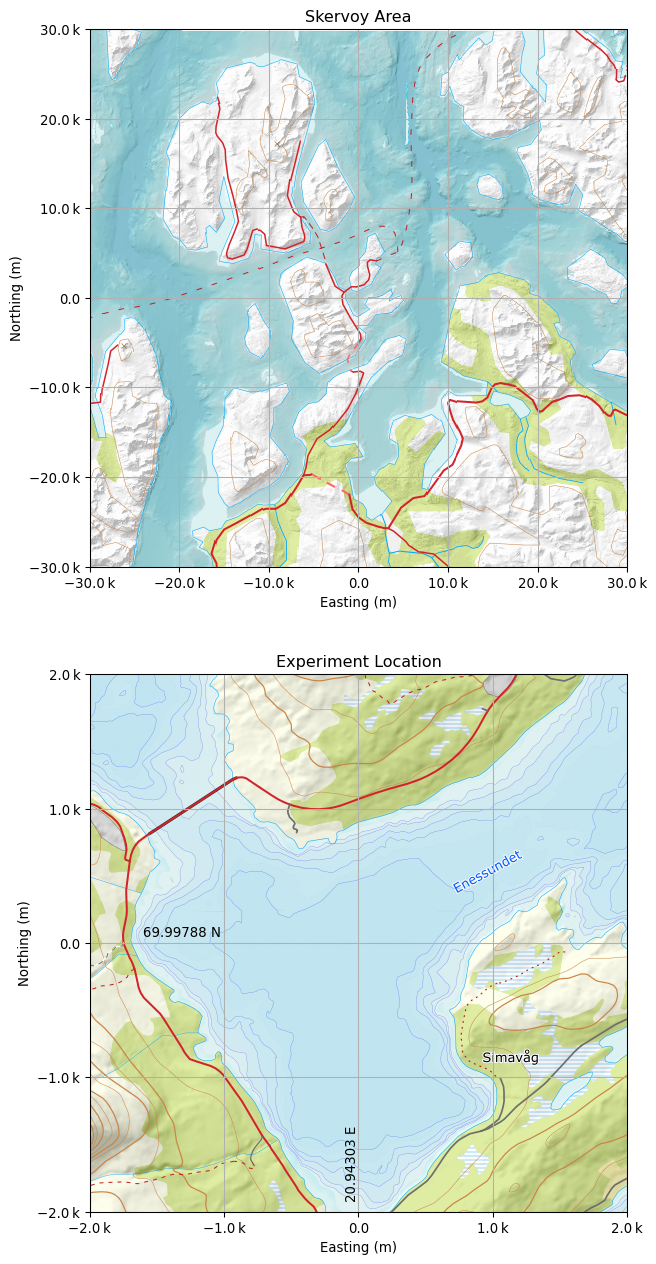

In [464]:
# plot maps of the test site
fig = plt.figure(figsize=(8,16), dpi=96)
axes = fig.subplots(2,1, subplot_kw={'projection':Ortho})
for i,ax in enumerate(axes) :
    if i==0:
        extent = (-30000, 30000, -30000, 30000)
    else:
         extent = (-2000, 2000, -2000, 2000)
    ax.set_extent(extent, crs=Ortho)
    
    # now add the layers in order: 
    # the format option is unfortunately not recognized by the server
    ax.add_wms(wms='https://openwms.statkart.no/skwms1/wms.topo4',
               layers='Vannflate')
    ax.add_wms(wms='https://wms.geonorge.no/skwms1/wms.havbunnraster3',
               layers='farget_havbunnraster_dybde_skygge',
               wms_kwargs = {'transparent': True})
    ax.add_wms(wms='https://wms.geonorge.no/skwms1/wms.dybdedata2',
               layers=('Dybdelag','Dybdekontur'), 
               wms_kwargs = {'transparent': True, 'format_options':'dpi:600'})
    ax.add_wms(wms='https://openwms.statkart.no/skwms1/wms.topo4', 
               layers=('Arealdekkeflate', 'fjellskygge', 'vannkontur',
                       'elver','Hoydekurver', 'Veger','Ferger',
                       'Stedsnavn','Hoydepunkt'),
               wms_kwargs = {'transparent':True, 'code':'JRy',
                             'format_options':'dpi:30',
                             })

    # add depthcurves
    if i==1:
        geoms = [r.geometry for r in csr.Reader('Dybdekurve.shp').records() 
                        if r.attributes['DYBDE'] in [5,10,20,30,50,100]]
        ax.add_feature(cartopy.feature.ShapelyFeature(geoms,crs=LatLon), 
                       facecolor='none', edgecolor='blue', linewidth=0.1)
    
    # explicit ticks are needed to display the axes
    ax.set_xticks([extent[0],extent[1]])
    ax.set_yticks([extent[2],extent[3]]) 
    if i==0:
        ax.xaxis.set_major_locator(tik.MultipleLocator(10000))
        ax.yaxis.set_major_locator(tik.MultipleLocator(10000))
    else:
        ax.xaxis.set_major_locator(tik.MultipleLocator(1000))
        ax.yaxis.set_major_locator(tik.MultipleLocator(1000))
    ax.xaxis.set_major_formatter(
        tik.EngFormatter(places=1, sep="\N{THIN SPACE}"))
    ax.yaxis.set_major_formatter(
        tik.EngFormatter(places=1, sep="\N{THIN SPACE}"))
    ax.grid(True)
    
    ax.set_xlabel('Easting (m)')
    ax.set_ylabel('Northing (m)')
    if i==0:
        ax.set_title('Skervoy Area');
    else:
        ax.set_title('Experiment Location');
        ax.text(extent[0]+400, 50,'{0:.5f} N'.format(site_lat))
        ax.text(-100,extent[2]+100,'{0:.5f} E'.format(site_lon), 
                fontdict={'rotation':'vertical'})
        
        

### Test Signal

We play white noise of different levels for about 10 s each: 1 mV, 5 mV, 10 mV, 50 mV, 100 mV, 200 mV, 500 mV.  It is a gaussian white noise, generated on the FPGA and the indicated values are standard deviation (rms). Note, a 200 mV noise can reach values of 1V peak. Audio signals of type “line” are usually limited to +/- 1V. Our converters can go beyond that up to ca 5 volts, but we do not know the limits of the audio amplifier input.  

In [9]:
Source = file['Signal']['Lubell'] # channel object of the TDMS file
t0 = Source.properties['wf_start_time']
dt = Source.properties['wf_increment']

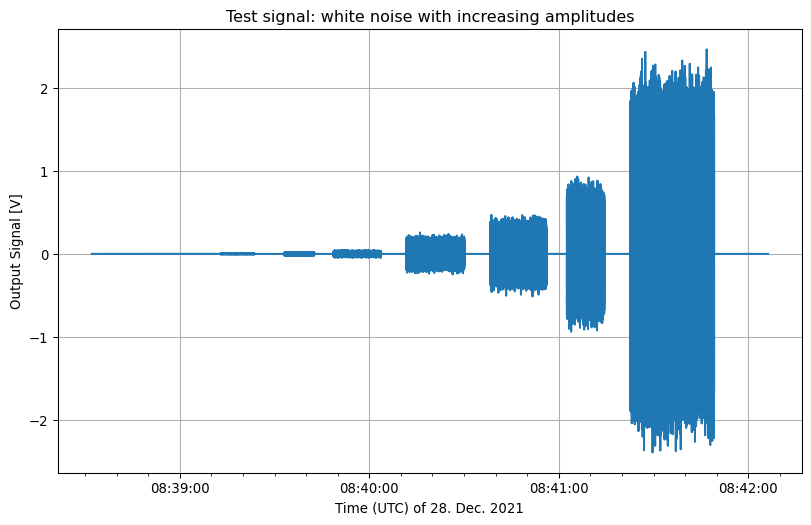

In [10]:
Source_time = Source.time_track(absolute_time=True, accuracy='us').copy()
Source_signal = Source.data.copy()

fig = plt.figure(figsize=(10,6), dpi=96)
ax = fig.subplots(1,1)
ax.plot(Source_time, Source_signal)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S')) 
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
ax.xaxis.set_minor_locator(mdates.SecondLocator(bysecond=[10,20,30,40,50]))

ax.grid()
ax.set_ylabel('Output Signal [V]')
t0_datestring = t0.astype(datetime).strftime('%d. %b. %Y')
ax.set_xlabel('Time (UTC) of '+ t0_datestring)
ax.set_title('Test signal: white noise with increasing amplitudes');

In [309]:
# We manualy define the time sections with different rms amplitudes 

sections = {
     'silence': ['08:38:40', '08:38:50'],
     '1 mV':    ['08:39:13', '08:39:23'],
     '5 mV':    ['08:39:34', '08:39:42'],
     '10 mV':   ['08:39:49', '08:40:03'],
     '50 mV':   ['08:40:12', '08:40:29'], 
     '100 mV':  ['08:40:39', '08:40:56'],
     '200 mV':  ['08:41:03', '08:41:14'],
     '500 mV':  ['08:41:23', '08:41:49']
    }
levels = {
     'silence': 0 ,
     '1 mV':    0.001 ,
     '5 mV':    0.005 ,
     '10 mV':   0.01 ,
     '50 mV':   0.05 , 
     '100 mV':  0.1 ,
     '200 mV':  0.2 ,
     '500 mV':  0.5     
    }

### Hydrophone Response Signals

In [16]:
# read all four hydrophone channels for each section

hydrophones = ['Hydrophone A1', 'Hydrophone A2',
               'Hydrophone A3', 'Hydrophone A4']
hyd_channels = [file['Signal'][ch] for ch in hydrophones]
dt_us = np.timedelta64(int(dt*1e6), 'us') 
excitation = {}
responses = {}
labels = {}
for (section_label, timeedges) in sections.items():
    indexes = [int((np.datetime64('2021-12-28T' + t) - t0) / dt_us) 
               for t in timeedges]
    excitation[section_label] = Source_signal[indexes[0]:indexes[1]]
    responses[section_label] = [channel.data[indexes[0]:indexes[1]] 
                                for channel in hyd_channels] 

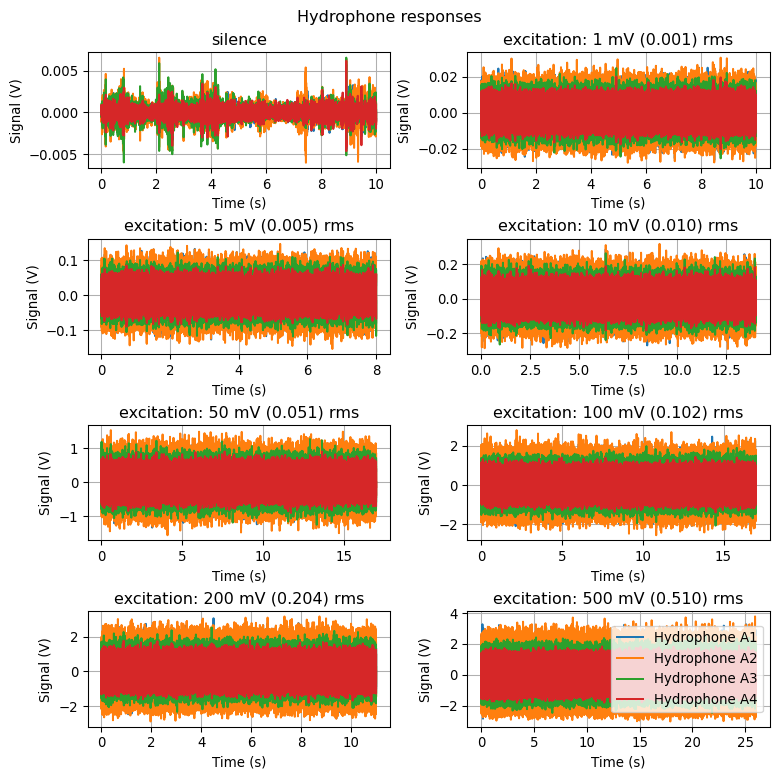

In [462]:
# plot the time traces

fig = plt.figure(figsize=(8,8), dpi=96, layout='constrained')
axes = fig.subplots(4,2)
for (section, ax) in zip(sections, axes.flatten()): 
    tt = np.arange(0, len(excitation[section])*dt, dt)
    for i, hydrophone in enumerate(hydrophones):
        ax.plot(tt, responses[section][i], label=hydrophone)

    ax.grid()
    if section=='500 mV':
        ax.legend(loc='center right')
    ax.set_ylabel('Signal (V)')
    ax.set_xlabel('Time (s)')
    if section=='silence':
        ax.set_title('silence')
    else:
        ax.set_title('excitation: '+section+' ('+
                     '{:.3f}'.format(excitation[section].std()) +
                     ') rms')
fig.suptitle('Hydrophone responses');

### Calibration with RMS Values

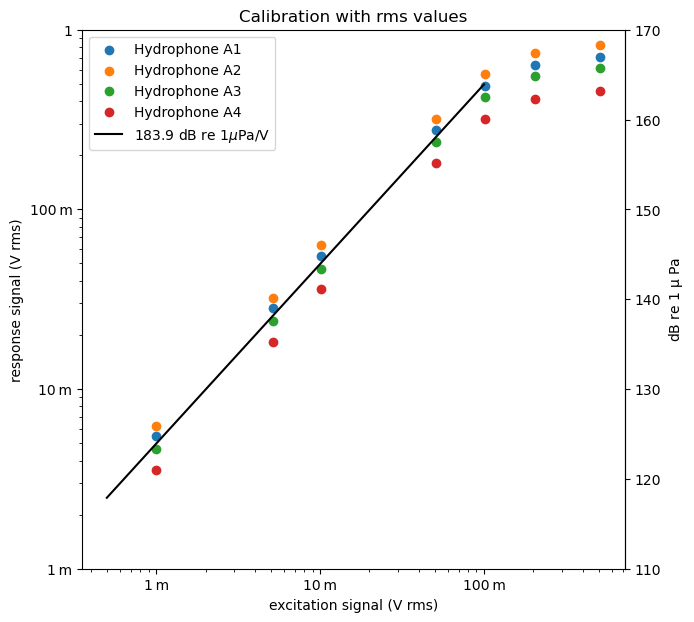

In [360]:
# plot the rms values

fig = plt.figure(figsize=(7,7))
ax = fig.subplots()
ax.set_xscale('log')
ax.set_yscale('log')

exc = [excitation[section].std() for section in sections]
res = [ [r.std() for r in responses[section]] for section in sections]

for (i, hydrophone) in enumerate(hydrophones):
    ax.scatter(exc, [r[i] for r in res], label=hydrophone)

s = 0    
for (j,section) in enumerate(sections):
    for (i, hydrophone) in enumerate(hydrophones):
        if section in ['1 mV', '5 mV', '10 mV', '50 mV']:
            s = s + res[j][i] / exc[j] 
s = s / 16

p = np.array([0.0005, 0.1])
ax.plot(p, s*p, label='{:.1f} dB re 1$\mu$Pa/V'.format(20*np.log10(s)+170),
        color='k')
ax.legend(loc='upper left')
ax.set_title('Calibration with rms values')
ax.xaxis.set_major_formatter(tik.EngFormatter(places=0, sep="\N{THIN SPACE}"))
ax.yaxis.set_major_formatter(tik.EngFormatter(places=0, sep="\N{THIN SPACE}"))
ax.set_xlabel('excitation signal (V rms)')
ax.set_ylabel('response signal (V rms)')
ax.set_ylim([0.001, 1])

# 170 dB re 1 V/uPa is the nominal calibration fo the hydrophones 
def TodB(x):
    return (20*np.log10(x)+170)  
def FromdB(x):
    return (10**((x-170)/20))
secay = ax.secondary_yaxis('right', functions=(TodB, FromdB))
secay.set_yscale('linear')
secay.set_ylabel('dB re 1 $\mathrm{\mu\;Pa}$');

The rms vlaues of the responses scale linearly with the rms values of the excitations. For excitation levels 100 mV and above the gain saturates. For the right axis the nominal calibration of -170 dB re 1 V/$\mu$Pa is used. The average over all hydrophones and excitation levels of 1 mV, 5 mV, 10 mV and 50 mV yields a calibration value of 183.9 dB re 1 $\mu$Pa/V for the speaker system.   

### Power Spectral Density and Noise Floor

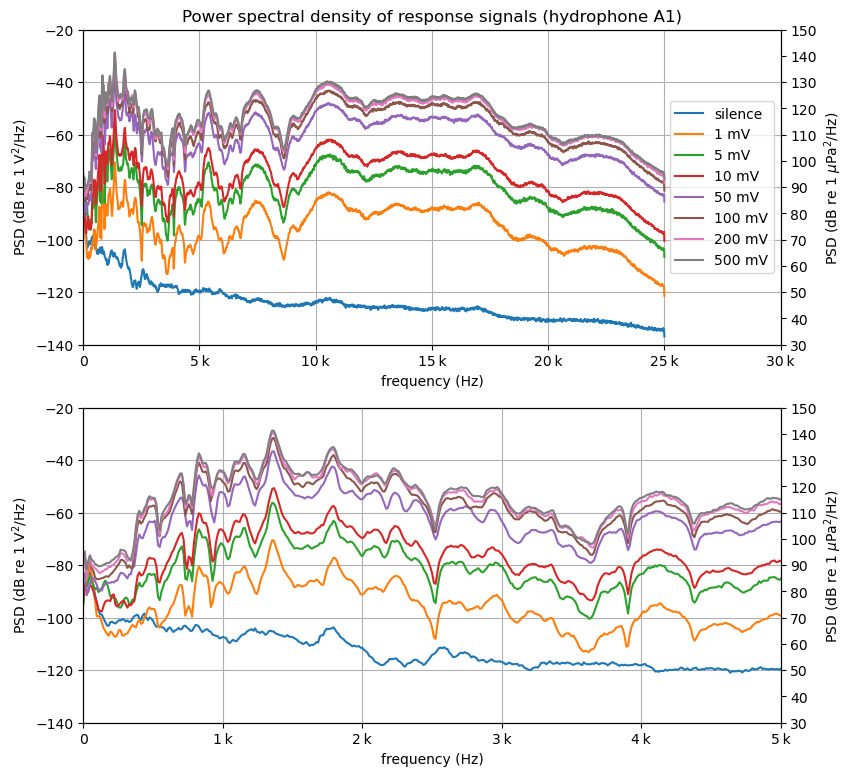

In [374]:
# plot the power spectral density for hydrophone A1 and all excitation levels

fig = plt.figure(figsize=(9,9))
axes = fig.subplots(2,1)


hydrophone = 0
for (i,ax) in enumerate(axes):
    for section in sections:
        f, psd = spsig.welch(responses[section][hydrophone], 1/dt, 
                             window='ham', scaling='density', nperseg = 4096) 
        ax.plot(f, 10*np.log10(psd), label=section)
    
    ax_cal = ax.twinx()
    if i==0:
        ax.legend(loc='center right')
        ax.set_title(
            'Power spectral density of response signals (hydrophone A1)')
        ax.set_xlim([0, 30000])
    else:
        ax.set_xlim([0, 5000])
    ax.set_xlabel('frequency (Hz)')
    ax.set_ylim([-140, -20])
    # we use -170dB V/uPa as the calibration of the hydrophones 
    ax_cal.set_ylim([30, 150])
    ax_cal.yaxis.set_major_locator(tik.MultipleLocator(10, ))
    ax.xaxis.set_major_formatter(
        tik.EngFormatter(places=0, sep="\N{THIN SPACE}"))
    ax.yaxis.set_major_formatter(
        tik.EngFormatter(places=0, sep="\N{THIN SPACE}"))
    ax_cal.yaxis.set_major_formatter(
        tik.EngFormatter(places=0, sep="\N{THIN SPACE}"))
    ax.set_ylabel('PSD (dB re 1 $\mathrm{V}^2/\mathrm{Hz}$)')
    ax_cal.set_ylabel('PSD (dB re 1 $\mu \mathrm{Pa}^2/\mathrm{Hz}$)')
    ax.grid();

Power spectral density of the hydophone signal for various source amplitudes. For the right y-scale, we used the nominal calibration value of the hydrophones of -170dB re 1 V/$\mu$Pa. The first (lowest) curve is when no sound is played; it is the ambient sound level in the sea and is plausible with published values (sea state zero). The noise floor of the AD converter is -130 dB re V$^2$/Hz, The decay from 22 - 25 kHz is due to the antaliasing filter. The preamps of the hydrophones are specified with a noise floor of 40 dB re 1$\mu$Pa/$\sqrt{\mathrm{Hz}}$, and silent water (sea state zero) has a noise level of 40 dB. Below 20 kHz the system reaches the noise limit and below 10 kHz the environmental noise becomes dominant.  

### Coherence

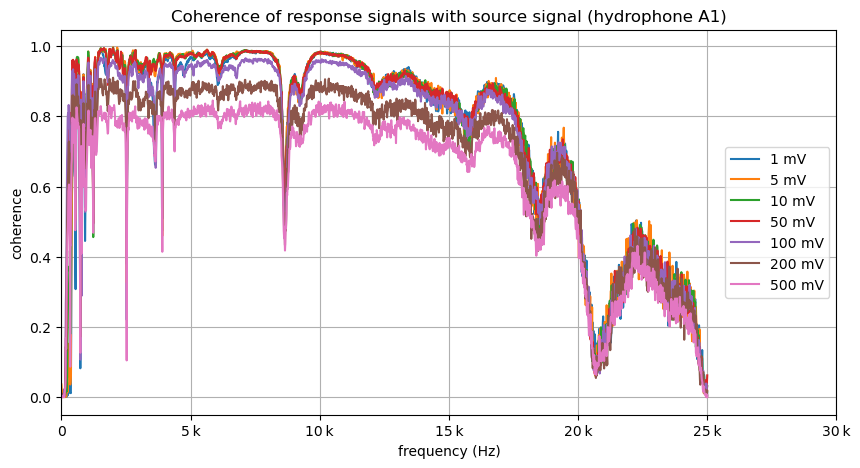

In [466]:
# coherence 

nfft = 4096
hydrophone = 0;

fig = plt.figure(figsize=(10,5))
ax = fig.subplots(1,1)

for section in sections:
    if section=='silence':
        continue
    res = responses[section][hydrophone] 
    src = excitation[section]

    
    #power spectral density
    f, src_psd = spsig.welch(src, 1/dt, window='ham', 
                             scaling='density', nperseg=nfft) 
    f, res_psd = spsig.welch(res, 1/dt, window='ham', 
                             scaling='density', nperseg=nfft)
    #cross spectral density
    f, csd = spsig.csd(src, res, 1/dt, nperseg=nfft)
    gain = csd / src_psd
    # coherence 
    f, coh = spsig.coherence(src, res, 1/dt, detrend='constant', nperseg=nfft)
    
    ax.plot(f, coh, label=section)

ax.set_title(
    'Coherence of response signals with source signal (hydrophone A1)')
ax.set_xlim([0, 30000])
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('coherence')
ax.xaxis.set_major_formatter(tik.EngFormatter(places=0, sep="\N{THIN SPACE}"))
ax.legend(loc='center right')
ax.grid();
    

The coherence is the fraction of the power in a output signal that can be explained by a linear transfer function from the input signal. Values smaller than 1 indicate additional noise or nonlinearities. 

### Cross Power Spectrum

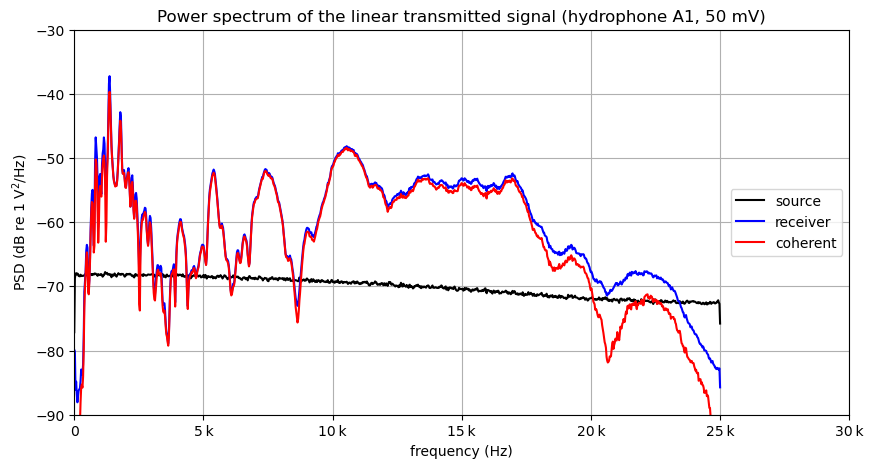

In [467]:
# coherent part of the signal (the linear transmitted signal)

nfft = 2048
section = '50 mV'
hydrophone = 0

fig = plt.figure(figsize=(10,5))
ax = fig.subplots()

res = responses[section][hydrophone] 
src = excitation[section]

f, src_psd = spsig.welch(src, 1/dt, window='ham', 
                         scaling='density', nperseg=nfft) 
f, res_psd = spsig.welch(res, 1/dt, window='ham', 
                         scaling='density', nperseg=nfft)
f, csd = spsig.csd(src, res, 1/dt, nperseg=nfft)

ax.plot(f, 10*np.log10(src_psd), color='k', label='source')
ax.plot(f, 10*np.log10(res_psd), color='b', label='receiver')
ax.plot(f, 10*np.log10(np.abs(csd)**2 / src_psd), color='r', label='coherent')

ax.set_title(
    'Power spectrum of the linear transmitted signal (hydrophone A1, '+
    section+')')
ax.set_xlim([0, 30000])
ax.set_xlabel('frequency (Hz)')
ax.xaxis.set_major_formatter(tik.EngFormatter(places=0, sep="\N{THIN SPACE}"))
ax.set_ylim([-90, -30])
ax.set_ylabel('PSD (dB re 1 $\mathrm{V}^2/\mathrm{Hz}$)')
ax.legend(loc='center right')
ax.grid();

### Frequency Dependent Calibration Curve  

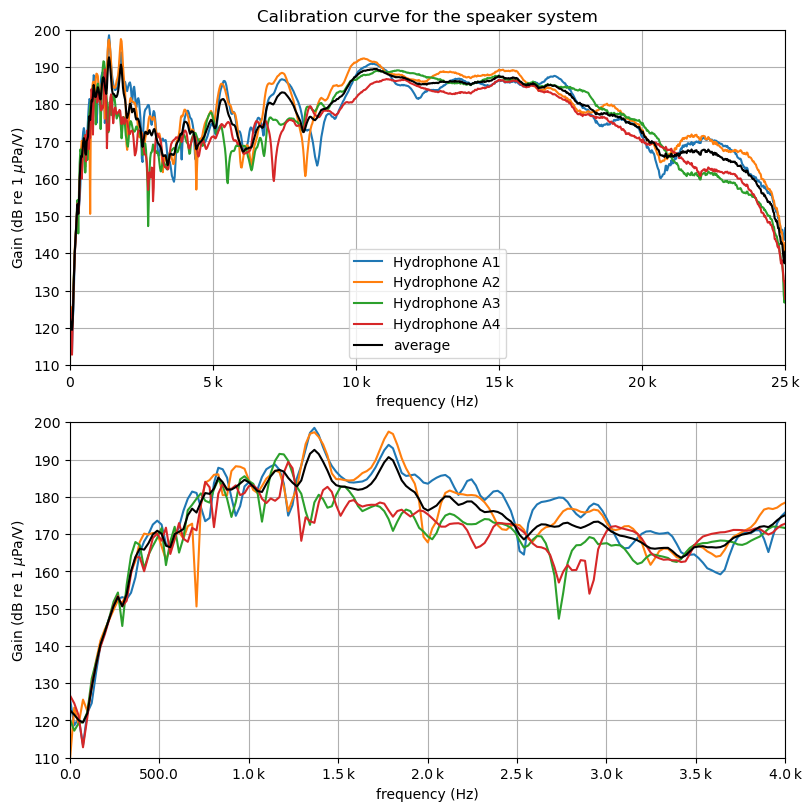

In [468]:
# compute the transfer function for 50 mV (largest but still linear stimulus)
# average over all hydrophones and using a nominal calibration of 
# the hydrophones of -170 dB re 1 V/uPa

nfft = 2048
section = '50 mV'

fig = plt.figure(figsize=(8,8),layout='constrained')
ax, ax2 = fig.subplots(2,1)

gain_avg = np.zeros(int(nfft/2)+1)
for (i,hydrophone) in enumerate(hydrophones):
    res = responses[section][i] 
    src = excitation[section]

    f, src_psd = spsig.welch(src, 1/dt, window='ham', 
                             scaling='density', nperseg=nfft) 
    f, res_psd = spsig.welch(res, 1/dt, window='ham', 
                             scaling='density', nperseg=nfft)
    f, csd = spsig.csd(src, res, 1/dt, nperseg=nfft)

    gain = np.abs(csd / src_psd)  # csd is complex valued 
    gain_avg = gain_avg + gain
    
    # calibration of the hydrophone: -170 dB re 1 V/uPa
    ax.plot(f, 20*np.log10(gain) + 170, label=hydrophone) 
    ax2.plot(f, 20*np.log10(gain) + 170, label=hydrophone)

gain_avg = gain_avg/len(hydrophones)
ax.plot(f, 20*np.log10(gain_avg) + 170, color='k', label='average')
ax.set_title('Calibration curve for the speaker system')
ax.set_xlim([0, 25000])
ax.set_xlabel('frequency (Hz)')
ax.xaxis.set_major_formatter(tik.EngFormatter(places=0, sep="\N{THIN SPACE}"))
ax.set_ylim([110, 200])
ax.set_ylabel('Gain (dB re 1 $\mu$Pa/V)')

ax2.plot(f, 20*np.log10(gain_avg) + 170, color='k', label='average')
ax2.set_xlim([0,4000])
ax2.set_xlabel('frequency (Hz)')
ax2.xaxis.set_major_formatter(tik.EngFormatter(places=1, sep="\N{THIN SPACE}"))
ax2.set_ylim([110, 200])
ax2.set_ylabel('Gain (dB re 1 $\mu$Pa/V)')

ax.legend(loc='lower center')
ax.grid();
ax2.grid();

# write the calibration curve to a csv file
np.savetxt('SpeakerCal.csv',
           np.column_stack((f, gain_avg)),
           fmt='%10.3e', 
           delimiter=',',
           header=('frequency, gain (Pa/V)')
          )

## Impulse response function

gain: 185.2 dB re uPa/V


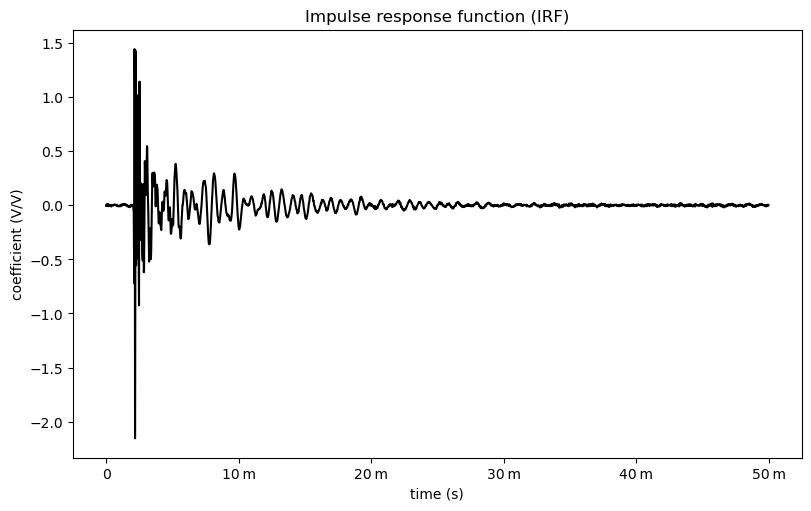

In [408]:
# impulse response function
# stimulus is white, so the crosscorrelation yields the impulse response

section= '50 mV'
hydrophone = 0

# length of IRF: 50 ms
N = int(0.05 / dt)
time_irf = np.arange(0, N*dt, dt)

# pad with zeros by the length of the irf
res = np.concatenate((responses[section][hydrophone], np.zeros(N-1))) 
src = excitation[section]

cor = spsig.correlate(res, src, mode='valid', method='direct')
cor = cor / np.linalg.norm(src)**2      # normalize with the source

fig = plt.figure(figsize=(8,5),layout='constrained')
ax = fig.subplots(1,1)

ax.plot(time_irf, cor, color='k', label='IRF')
#ax.plot(res)
#ax.plot(src)
ax.set_title('Impulse response function (IRF)')
#ax.set_xlim([0, 0.005])
ax.set_xlabel('time (s)')
ax.xaxis.set_major_formatter(tik.EngFormatter(places=0, sep="\N{THIN SPACE}"))
#ax.set_ylim([-1, 1])
ax.set_ylabel('coefficient (V/V)');
print('gain: {:.1f} dB re uPa/V'.format(10*np.log10((cor**2).sum())+170))

From the impulse response function we get the delay between source and receiver. 1 ms corresponds to 1.5 m sound travel distance (speed of sound = 1500 m/s). For the distance of 1m between hydrophone and speaker, we would expect 0.66 ms delay.The first peak we observe at 2.18 ms. There is an additional 1.514 ms delay in the system. The AD converter module specifies a delay of 604 us, the DA module 792 us, total 1.388. The remaining 0.153 ms is from the hardware interfacce between FPGA and converters. 

gain: 185.2 dB re uPa/V


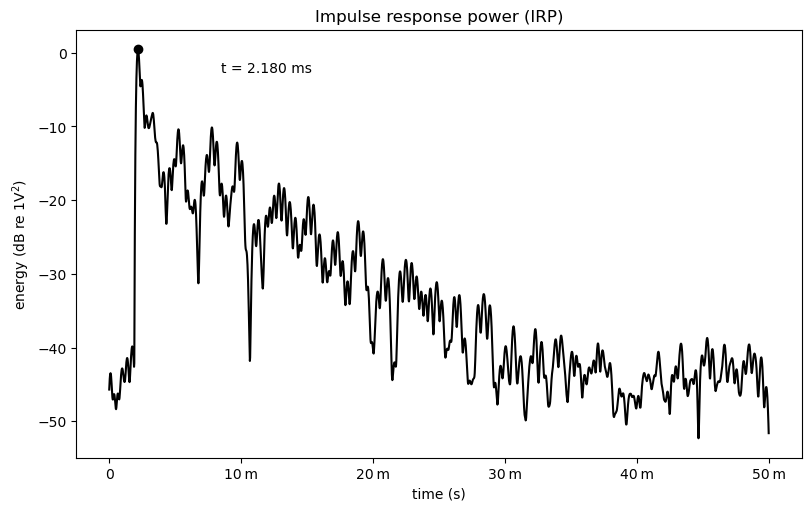

In [412]:
window = spsig.windows.hann(21) # smothing a little (20us * 21 = 0.42 ms)
window = window / window.sum() # norm the window
irp = spsig.convolve(cor**2, window, mode='same', method='direct')
tm = irp.argmax()*dt

fig = plt.figure(figsize=(8,5),layout='constrained')
ax = fig.subplots(1,1)
ax.plot(time_irf, 10*np.log10(irp), color='k', label='IRP')
ax.plot(tm,10*np.log10(irp[int(tm/dt)]),'o',color='k')
ax.annotate(text='t = '+str(tm*1000)+'0 ms', 
            xy=(tm, 10*np.log10(irp[int(tm/dt)])), 
            xytext=(0.2, 0.9), textcoords='axes fraction')
ax.set_xlabel('time (s)')
ax.xaxis.set_major_formatter(tik.EngFormatter(places=0, sep="\N{THIN SPACE}"))
ax.set_ylabel('energy (dB re 1V$^2$)');
ax.set_title('Impulse response power (IRP)' )
print('gain: {:.1f} dB re uPa/V'.format(10*np.log10((irp).sum())+170))


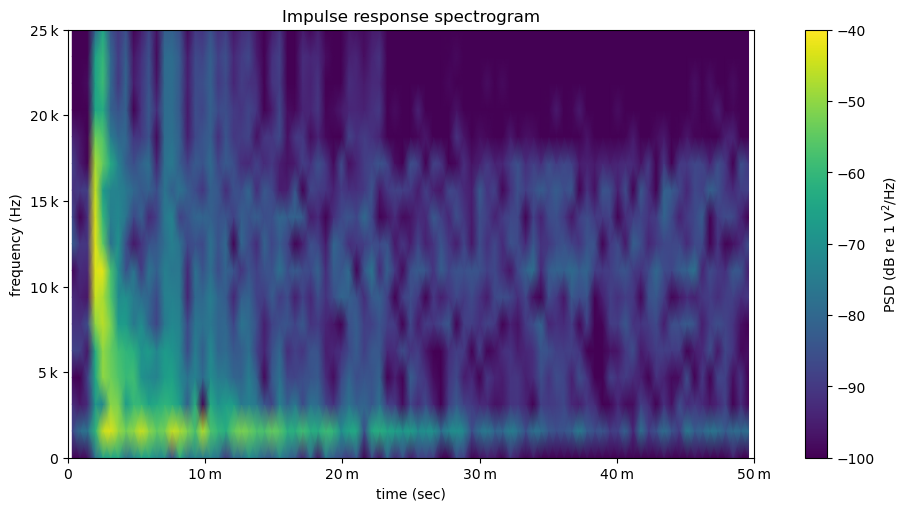

In [469]:
(f, t, spectr) = spsig.spectrogram(cor, 1/dt, window=('gaussian',16),
                                   nperseg=32, noverlap=4)

fig = plt.figure(figsize=(9,5),layout='constrained')
ax = fig.subplots(1,1)

pcm = ax.pcolormesh(t, f, 10*np.log10(spectr), 
                    shading='gouraud', cmap='viridis',vmin=-100, vmax=-40)
ax.set_xlim([0, 0.05])
#ax.set_zlim([-120, -40])
ax.set_ylabel('frequency (Hz)')
ax.set_xlabel('time (sec)')
ax.xaxis.set_major_formatter(tik.EngFormatter(places=0, sep="\N{THIN SPACE}"))
ax.yaxis.set_major_formatter(tik.EngFormatter(places=0, sep="\N{THIN SPACE}"))
ax.set_title('Impulse response spectrogram')
cbar = fig.colorbar(pcm, ax=ax)
cbar.set_label('PSD (dB re 1 V$^2$/Hz)');

The spectrogram if the impulse response function sugests that there are resonances around 1 kHz. 